In [38]:
import pandas as pd
import numpy as np
import math,datetime
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

In [39]:
data = pd.read_csv("../data/la_liga_players.csv")
data2 = pd.read_csv("../data/player_trophies.csv")

#This shows me all the columns in the dataset when I do df.head():
pd.set_option('display.max_columns', None)
df = data.copy()
df_trophies = data2.copy()
df.head()

,id,position,name,first_name,last_name,twitter_username,twitter_followers,age,nationality,height,weight,minutes,goals,assists,saves,rating,team_name,goals_minutes_coeff,saves_minutes_coeff,assists_minutes_coeff,rating_minutes_coeff,titles
0,144,Attacker,L. Messi,Lionel Andrés,Messi Cuccittini,TeamMessi,2981402.0,34.0,Argentina,170.0,72.0,2302,23,8,0,8.32222,Barcelona,0.009991,0.000000,0.003475,0.003615,43.0
1,295,Goalkeeper,Dani Cárdenas,Daniel,Cárdenas Lindez,None,NaN,24.0,Spain,186.0,80.0,270,0,0,19,8.03333,Levante,0.000000,0.070370,0.000000,0.029753,0.0
2,399,Goalkeeper,Ángel Jiménez,Ángel,Jiménez,None,NaN,19.0,Spain,NaN,NaN,90,0,0,7,8.00000,Granada CF,0.000000,0.077778,0.000000,0.088889,0.0
3,68,Midfielder,T. Kroos,Toni,Kroos,ToniKroos,8938851.0,31.0,Germany,183.0,76.0,1959,2,8,0,7.71154,Real Madrid,0.001021,0.000000,0.004084,0.003936,28.0
4,490,Goalkeeper,Juan Pérez,Juan Manuel,Pérez Ruiz,None,NaN,25.0,Spain,187.0,83.0,90,0,0,3,7.70000,Osasuna,0.000000,0.033333,0.000000,0.085556,1.0


In [27]:
df.describe()

,id,twitter_followers,age,height,weight,minutes,goals,assists,saves,rating,goals_minutes_coeff,saves_minutes_coeff,assists_minutes_coeff,rating_minutes_coeff,titles
count,728.000000,1.100000e+01,723.000000,657.000000,622.000000,728.000000,728.000000,728.000000,728.000000,728.000000,548.000000,548.000000,548.000000,548.000000,728.000000
mean,364.500000,8.943429e+06,26.338866,181.097412,74.530547,782.909341,0.953297,0.649725,1.960165,5.000167,0.001046,0.001843,0.000795,0.044829,2.822802
std,210.299786,7.340980e+06,4.755224,6.264467,6.487560,801.163229,2.280354,1.349349,10.569339,2.962234,0.001847,0.007679,0.001998,0.147818,5.283457
min,1.000000,2.930240e+05,17.000000,163.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,182.750000,2.544660e+06,22.000000,176.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003891,0.000000
50%,364.500000,8.938851e+06,26.000000,182.000000,74.000000,501.500000,0.000000,0.000000,0.000000,6.637500,0.000000,0.000000,0.000000,0.006865,1.000000
75%,546.250000,1.450648e+07,30.000000,186.000000,79.000000,1467.000000,1.000000,1.000000,0.000000,6.825480,0.001339,0.000000,0.001126,0.016880,3.000000
max,728.000000,1.995548e+07,41.000000,199.000000,96.000000,2610.000000,23.000000,10.000000,93.000000,8.322220,0.014085,0.077778,0.035714,1.675000,43.000000


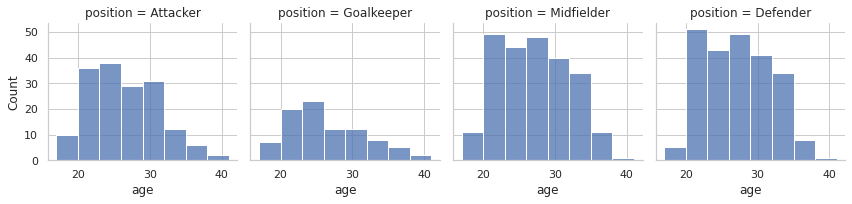

In [49]:
sns.displot(
    df, x="age", col="position",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

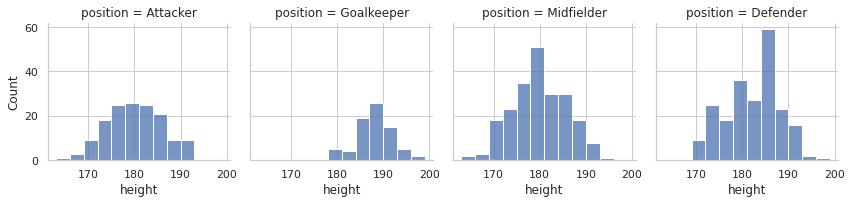

In [51]:
sns.displot(
    df, x="height", col="position",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

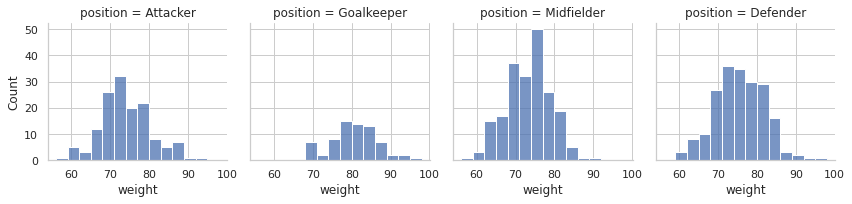

In [53]:
sns.displot(
    df, x="weight", col="position",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<AxesSubplot:xlabel='goals', ylabel='Count'>

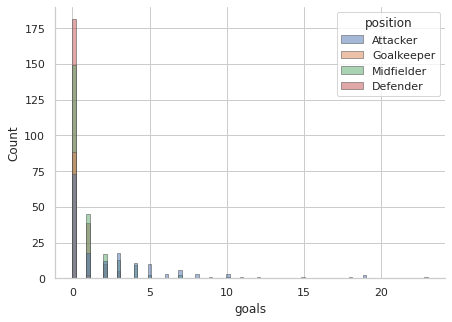

In [59]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="goals", hue="position",
    edgecolor=".3",
    linewidth=.5,
)


<AxesSubplot:xlabel='height', ylabel='weight'>

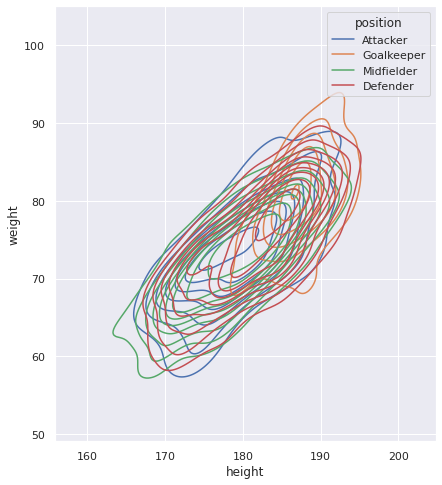

In [62]:
sns.set_theme(style="darkgrid")
iris = sns.load_dataset("iris")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=df,
    x="height",
    y="weight",
    hue="position",
    thresh=.1,
)